# Regression - Introduction

## Exercise 1: housing regression

### 1.1

Using the *housing.csv* file, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [106]:
# exercise 1.1

import matplotlib.pyplot as plt 
import numpy as np 
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [107]:
df = pd.read_csv('../data/housing.csv')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


In [132]:
#adding constant and showing in summary
X = df.drop(['PRICE'], axis=1)
y = df.PRICE

X = sm.add_constant(X)

est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.266e+28
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:11:58   Log-Likelihood:                 13612.
No. Observations:                 506   AIC:                        -2.720e+04
Df Residuals:                     492   BIC:                        -2.714e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -95.7721   8.41e-13  -1.14e+14      0.000     -95.772     -95.772
CRIM       -1.905e-15   3.55e-15     -0.536      0.592   -8.88e-15    5.07e-15
ZN         -7.286e-16   1.49e-15     -0.489      0.625   -3.66e-15     2.2e-15
INDUS      -1.679e-15    6.6e-15     -0.254      0.799   -1.46e-14    1.13e-14
CHAS        1.332e-15   9.34e-14      0.014      0.989   -1.82e-13    1.85e-13
NOX        -5.149e-13   4.19e-13     -1.230      0.219   -1.34e-12    3.08e-13
RM             6.2748    3.5e-14    1.8e+14      0.000       6.275       6.275
AGE         8.639e-16   1.42e-15      0.610      0.542   -1.92e-15    3.65e-15
DIS        -3.442e-15   2.26e-14     -0.153      0.879   -4.78e-14    4.09e-14
RAD        -3.789e-15   7.24e-15     -0.523      0.601    -1.8e-14    1.04e-14
TAX        -7.125e-16   4.08e-16     -1.746      0.081   -1.51e-15    8.94e-17
PTRATIO     -9.09e-15   1.47e-14     -0.617      0.538    -3.8e-14    1.99e-14
LSTAT      -2.096e-15   5.99e-15     -0.350      0.727   -1.39e-14    9.68e-15
response      12.5496   5.62e-14   2.23e+14      0.000      12.550      12.550
error          6.2748   3.88e-14   1.62e+14      0.000       6.275       6.275
==============================================================================
Omnibus:                      147.149   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.957
Skew:                           0.782   Prob(JB):                     1.44e-16
Kurtosis:                       1.993   Cond. No.                     4.84e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.34e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [134]:
model = smf.ols('RM~PRICE',df).fit() #dependent and indepent variable

In [135]:
b0 = model.params[0] #intercept
b1 = model.params[1] #coefficient
print('intercept: ', b0)
print('coefficient: ',b1)

intercept:  5.087638671836051
coefficient:  0.05312235406004047


In [136]:
prediction = model.predict(df)  #regression 
#prediction.tail()

501    6.277579
502    6.181959
503    6.357263
504    6.256330
505    5.719795
dtype: float64

In [137]:
df['response'] = model.predict(df)  #creating an response column
df['error'] = df['response'] - df['RM']  #creating an error column
df.tail()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE,response,error
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,6.277579,-0.315421
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,6.181959,0.061959
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,6.357263,-0.618737
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,6.256330,-0.537670
505,1.0,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9,5.719795,-0.310205


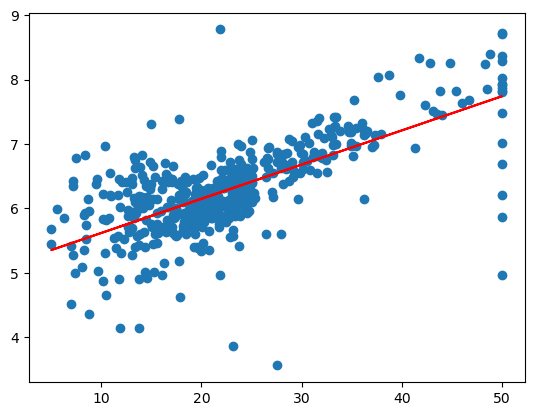

In [138]:
#LINEAR REGRESSION GRAPH
rm = df['RM']
price = df['PRICE']
response= df['response']

plt.scatter(price,rm)
plt.plot(price,response,color='r')
plt.show()

In [140]:
est.summary()
#r.squared is = 1.000

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.266e+28
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:13:57   Log-Likelihood:                 13612.
No. Observations:                 506   AIC:                        -2.720e+04
Df Residuals:                     492   BIC:                        -2.714e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -95.7721   8.41e-13  -1.14e+14      0.000     -95.772     -95.772
CRIM       -1.905e-15   3.55e-15     -0.536      0.592   -8.88e-15    5.07e-15
ZN         -7.286e-16   1.49e-15     -0.489      0.625   -3.66e-15     2.2e-15
INDUS      -1.679e-15    6.6e-15     -0.254      0.799   -1.46e-14    1.13e-14
CHAS        1.332e-15   9.34e-14      0.014      0.989   -1.82e-13    1.85e-13
NOX        -5.149e-13   4.19e-13     -1.230      0.219   -1.34e-12    3.08e-13
RM             6.2748    3.5e-14    1.8e+14      0.000       6.275       6.275
AGE         8.639e-16   1.42e-15      0.610      0.542   -1.92e-15    3.65e-15
DIS        -3.442e-15   2.26e-14     -0.153      0.879   -4.78e-14    4.09e-14
RAD        -3.789e-15   7.24e-15     -0.523      0.601    -1.8e-14    1.04e-14
TAX        -7.125e-16   4.08e-16     -1.746      0.081   -1.51e-15    8.94e-17
PTRATIO     -9.09e-15   1.47e-14     -0.617      0.538    -3.8e-14    1.99e-14
LSTAT      -2.096e-15   5.99e-15     -0.350      0.727   -1.39e-14    9.68e-15
response      12.5496   5.62e-14   2.23e+14      0.000      12.550      12.550
error          6.2748   3.88e-14   1.62e+14      0.000       6.275       6.275
==============================================================================
Omnibus:                      147.149   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.957
Skew:                           0.782   Prob(JB):                     1.44e-16
Kurtosis:                       1.993   Cond. No.                     4.84e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.34e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Exercise 1.2: Polynomial features

Use polynomial features to improve your regression model in `exercise 1.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [ ]:
df2 = pd.DataFrame()

In [118]:
model = smf.ols('RM~PRICE',df).fit() #dependent and indepent variable
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RM   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           2.49e-74
Time:                        12:56:13   Log-Likelihood:                -371.73
No. Observations:                 506   AIC:                             747.5
Df Residuals:                     504   BIC:                             755.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0876      0.060     85.492      0.000       4.971       5.205
PRICE          0.0531      0.002     21.722      0.000       0.048       0.058
==============================================================================
Omnibus:                      123.606   Durbin-Watson:                   1.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              931.463
Skew:                          -0.840   Prob(JB):                    5.44e-203
Kurtosis:                       9.431   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
df2 = pd.DataFrame()
df2['LSTAT'], df2['PRICE'] = df['LSTAT'],df['PRICE']

X = df2.drop(['PRICE'], axis=1)
y = df2.PRICE

X = sm.add_constant(X)

In [145]:
from sklearn.preprocessing import PolynomialFeatures

df2 = sm.add_constant(df2)

lstat = df2['LSTAT']
price = df2['PRICE']

#splitting
X_train, X_test, y_train, y_test = train_test_split(price,lstat, test_size=.20, random_state=0)
X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

#two degree polynomial
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_df)
#X_train_poly

model = linear_model.LinearRegression()
model = model.fit(X_train_poly, y_train) #power of 1, power of 2 -parameter order
coefficient = model.coef_
intercept = model.intercept_

In [146]:

est = sm.OLS(y, X).fit()
est.summary()

#R-Squares is 0.544 compared to 1.00 as seen on exercise #1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.08e-88
Time:                        19:30:42   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 1.3: Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.
- The y axis on each chart is the target value (house price)
- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each
- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well
- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

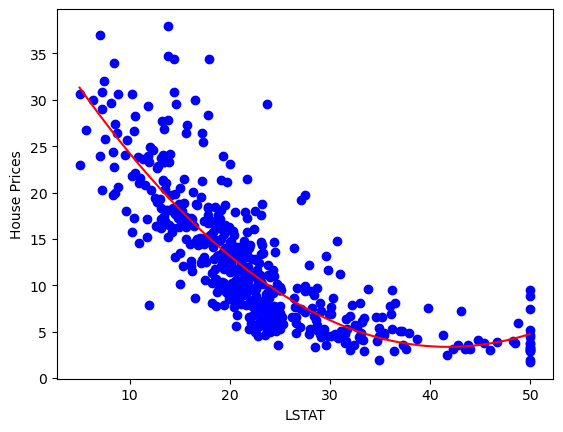

In [147]:
# exercise 1.3
x_axis = np.arange(5,50,0.1)
response2 = intercept + coefficient[1] * x_axis + coefficient[2] * x_axis**2

plt.scatter(price,lstat,color='b')
plt.plot(x_axis,response2,color='r')
plt.xlabel("LSTAT")
plt.ylabel("House Prices")
plt.show()

## Exercise 2: Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **1.3**, but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

C:\anacondafolder\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 2 features, but LinearRegression is expecting 3 features as input.

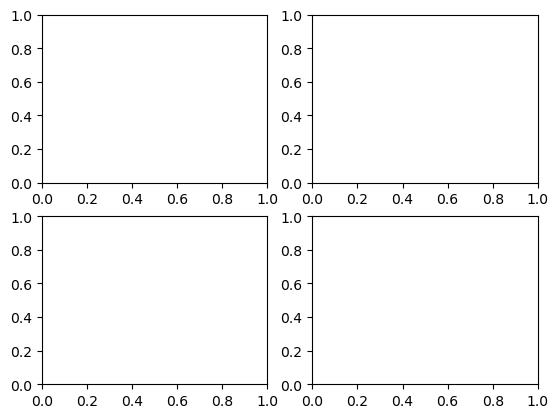

In [127]:
# exercise 2

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
y2_predictions = model.predict(df2)

def reg_plot_on_ax(feature_1, ax):
    min_ft = df[feature_1].min()
    max_ft = df[feature_1].max()

    x = np.linspace(min_ft,max_ft,506)
    sns.scatterplot(x=str(feature_1), y='PRICE', data=df, ax=ax)
    sns.lineplot(x=x, y=y2_predictions, color='r', ax=ax)
    ax.set_title(feature_1)
    ax.set_xlabel(feature_1, labelpad=10)
    ax.set_ylabel('Price', labelpad=10)

list_ft = ['AGE', 'NOX', 'DIS', 'TAX']
axes = [ax1, ax2, ax3, ax4]

for ft, ax in zip(list_ft,axes):
    reg_plot_on_ax(ft, ax)

plt.show()
